# Pandas for data processing and EDA

EDA = Explanatory Data Analysis: selecting features to use and how

In [295]:
%matplotlib inline

import pandas as pd
import numpy as np

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('train.csv', header=0)

from matplotlib import pyplot as plt
plt.xkcd()  # just to make things a bit less serious

## Looking into data

In [296]:
df.info()  # show columns in a dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [297]:
df.describe()  # show statistical properties of columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [298]:
df.head(4)  # let's peek at a chunk of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S


In [299]:
df['Age'][:5]  # also as `df.Age`

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: float64

## Filtering

In [300]:
(df.Age > 60)[:5]  # let's create filtering set of Trues and Falses and look at it

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [301]:
df[df.Age > 60].head(4)  # trying to use that filtering set on our dataset and see what gives

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


## Graphs

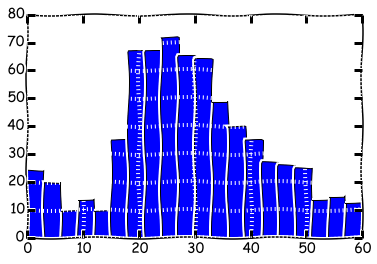

In [302]:
# graphs are cool! Let's see general age distribution on a ship
df.Age.hist(range=(0,60), bins=20)

In [303]:
# filtering sets can be combined
df.Age[(df.Survived == 1) & (df.Sex == 'female')].describe()

count    197.000000
mean      28.847716
std       14.175073
min        0.750000
25%       19.000000
50%       28.000000
75%       38.000000
max       63.000000
Name: Age, dtype: float64

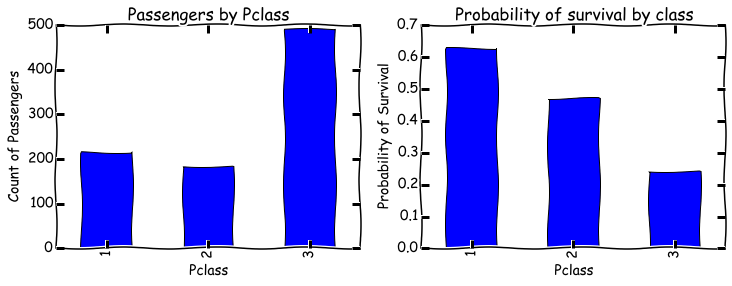

In [304]:
# we can group records: try checking out variables `by_class` and `percentage_by_class`
by_class = df.groupby('Pclass').Survived.count()
percentage_by_class = df.groupby('Pclass').Survived.sum() / df.groupby('Pclass').Survived.count()
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
by_class.plot(kind='bar')

ax2 = fig.add_subplot(122)
percentage_by_class.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

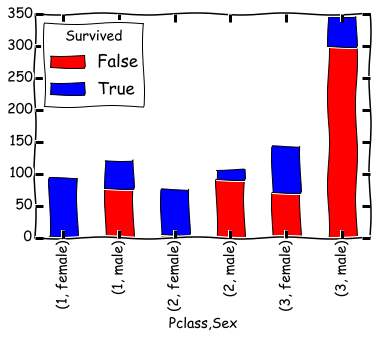

In [305]:
# we can even transpose two inputs to one output (crosstab) and plot it
pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool)
           ).plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Preparing data

In [306]:
# adding new column is easy
df['Gender'] = 4

In [307]:
df.head(4)  # let's see

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4


In [308]:
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )  # let's fill it with one letter
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,F


In [309]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)  # but actually we need int
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [310]:
# not all ages are filled in. This will couse us troubles, we have to fill something in.
# one way is to fill NaNs with global age average, but let's get creative and use mean for each age/class group
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [311]:
for i in range(0, 2):
    for j in range(0, 3):
        condition = (df.Gender == i) & (df.Pclass == j+1)
        median_ages[i,j] = df[condition].Age.dropna().median()

median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [312]:
df['AgeFill'] = df['Age']  # this is the column we will fill with new values

In [313]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,35
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,35


In [314]:
# looking into those which have NaNs for Age
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [315]:
# filling in with medians
for i in range(0, 2):
    for j in range(0, 3):
        condition = (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1)
        df.loc[condition, 'AgeFill'] = median_ages[i,j]

# checking that it worked
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [316]:
# constructing additional additional feature, may be it would be useful?
df['FamilySize'] = df['SibSp'] + df['Parch']
# taking only needed columns. (FamilySize will be included some other time)
clean_df = df[['Survived', 'Gender', 'Pclass', 'AgeFill', ]]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Gender      891 non-null int64
Pclass      891 non-null int64
AgeFill     891 non-null float64
dtypes: float64(1), int64(3)
memory usage: 34.8 KB


In [317]:
# now export it to NumPy array, because that what most scikit-learn algorithms expect
train_data = clean_df.values

## Training

In [318]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
forest = RandomForestClassifier(n_estimators = 100)

In [319]:
# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data[0::,1::],train_data[0::,0])  # all but first column, target is Survival

### Prediction

In [320]:
forest.predict([0, 3, 45])  # man in 3rd class, 45 y.o. drowns

array([ 0.])

In [321]:
forest.predict([1, 1, 25])  # woman in 1st class, 25 y.o. survives

array([ 1.])

In [322]:
# count number of errors on current (training) set
np.absolute(forest.predict(train_data[0::,1::]) - train_data[0::,0]).sum()

107.0

For the simplicity, we used entire dataset for training, which is not the thing to do in real life.
We need to keep some part of it for validating the resulting predictor, to avoid overfitting